# Exploratory Data Analysis on Layoffs 2022
#### In this exploratory data analysis project we will insights from Layoffs 2022 dataset. We will gain incredible insights from their distribution and classifications.


In [2]:
pip install seaborn



     -------------------------------------- 288.2/288.2 kB 1.8 MB/s eta 0:00:00


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib 
import seaborn as sns
import warnings
%matplotlib inline

## Data Preparation :

In [4]:
df = pd.read_csv('layoffs.csv')
df.head()

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised
0,TuSimple,San Diego,Transportation,700.0,0.50,2022-12-16,IPO,United States,648.0
1,Tomorrow,Hamburg,Finance,30.0,0.25,2022-12-16,Unknown,Germany,29.0
2,Improbable,London,Other,NaN,0.10,2022-12-16,Unknown,United Kingdom,704.0
3,SonderMind,Denver,Healthcare,NaN,0.15,2022-12-16,Series C,United States,183.0
4,Freshworks,SF Bay Area,Support,90.0,0.02,2022-12-15,IPO,United States,484.0


In [5]:
df.shape

(1821, 9)

In [6]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
total_laid_off,1275.0,194.869804,557.745446,3.0,32.0,70.00,150.00,11000.0
percentage_laid_off,1229.0,0.272866,0.264084,0.0,0.1,0.18,0.31,1.0
funds_raised,1687.0,850.212386,6236.491241,0.0,45.5,140.00,403.50,121900.0


In [7]:
df.dtypes

company                 object
location                object
industry                object
total_laid_off         float64
percentage_laid_off    float64
date                    object
stage                   object
country                 object
funds_raised           float64
dtype: object

In [8]:
#checking for Missing Values :

df.isna().sum()

company                  0
location                 0
industry                 6
total_laid_off         546
percentage_laid_off    592
date                     1
stage                    4
country                  0
funds_raised           134
dtype: int64

###### We can see a lot of Missing Values in total_laid_off column , Since no of Layoff per company is the important data and unique per company, we can't substitue it , let us fill those values with zeroes

In [21]:
df['total_laid_off'] = df['total_laid_off'].fillna(0)
df['percentage_laid_off'] = df['percentage_laid_off'].fillna(0)
df['stage'] = df['stage'].fillna(0)
df['funds_raised'] = df['funds_raised'].fillna(0)
df['industry'] = df['industry'].fillna(0)


In [24]:
df.dropna(inplace=True)

In [25]:
df.isna().sum()

company                0
location               0
industry               0
total_laid_off         0
percentage_laid_off    0
date                   0
stage                  0
country                0
funds_raised           0
dtype: int64

## 1 - Companies with Top Layoffs :

In [10]:
top_companies = df.nlargest(5,['total_laid_off'])

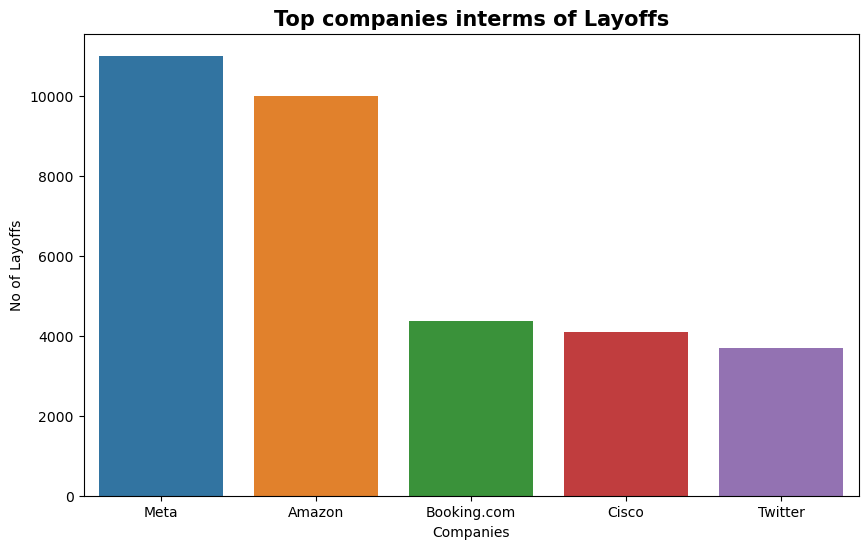

In [11]:
plt.figure(figsize=(10,6))
sns.barplot(x=top_companies.company, y=top_companies.total_laid_off)
plt.title("Top companies interms of Layoffs", fontsize=15, fontweight='bold')
plt.xlabel("Companies")
plt.ylabel("No of Layoffs")
plt.show()

##### Conclusion :
Meta, Amazon, Booking.com, Cisco & Twitter are the companies with most layoffs,
With Meta topping the chart with over 11000 layoffs.

## 2 - Layoffs by Companies across Sectors :

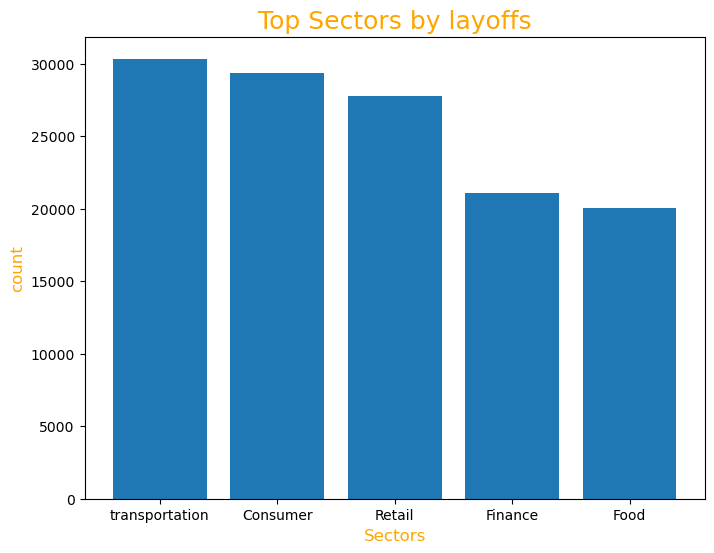

In [12]:
sectors = np.array(df.groupby('industry')['total_laid_off'].sum().sort_values(ascending=False).head())
arr = np.array(['transportation','Consumer','Retail','Finance','Food'])

arr = np.array(['transportation','Consumer','Retail','Finance','Food'])
plt.figure(figsize= (8 ,6))
plt.bar(arr,sectors)
plt.xlabel('Sectors',fontdict={'size':12,'color':'orange'})
plt.ylabel('count',fontdict={'size':12,'color':'orange'})
plt.title('Top Sectors by layoffs',fontdict={'size':18,'color':'orange'})
plt.show()

###### Transportaion sector have laid off People more than anyone else

## 3 - Countries that are Mostly affected by layoffs :

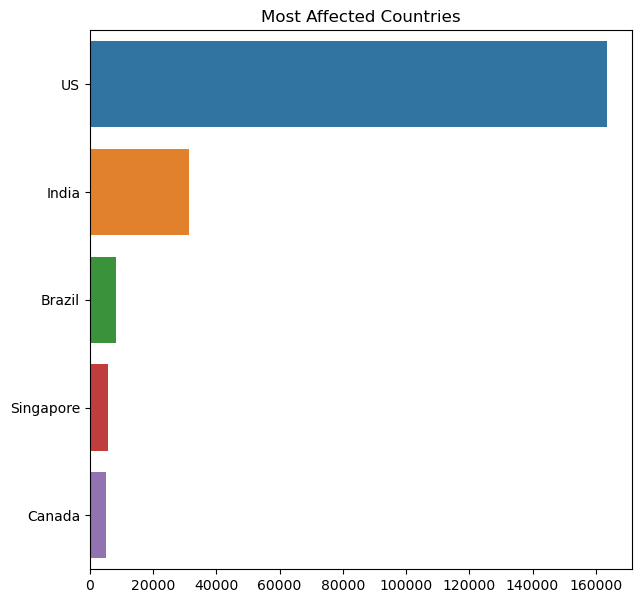

In [13]:
countries = np.array(df.groupby('country')['total_laid_off'].sum().sort_values(ascending=False).head())
arr1 = np.array(['US','India','Brazil','Singapore','Canada'])

plt.figure(figsize=(7,7))
ax = sns.barplot(x=countries, y=arr1, data=df)
plt.title('Most Affected Countries')
plt.show()

###### Conclusion :
The United States has seen the most layoffs, followed by India.

## 4 - City with Most no of Layoffs :

In [14]:
location = df.groupby('location')['total_laid_off'].sum().sort_values(ascending=False).head()
arr2 = np.array(['SF bay Area','NYC','Bengaluru','seattle','boston'])

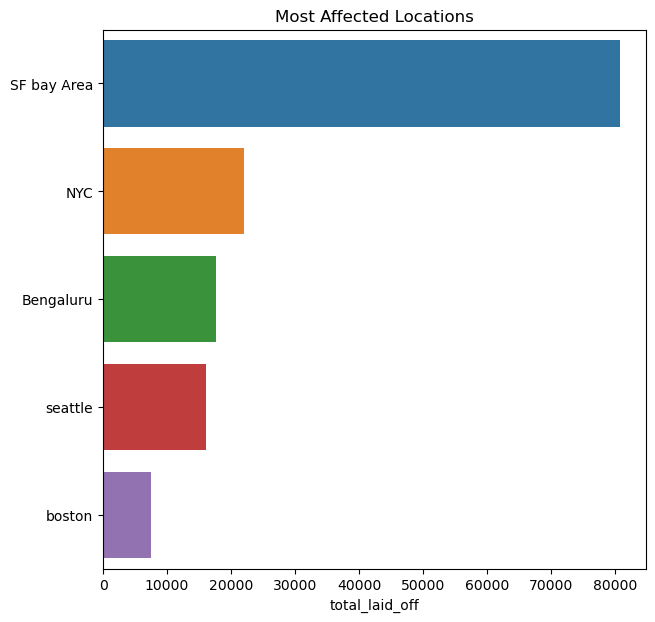

In [15]:
plt.figure(figsize=(7,7))
ax = sns.barplot(x=location, y=arr2, data=df)
plt.title('Most Affected Locations')
plt.show() 

###### San Francisco bay Area have been Most affected by the layoffs

In [26]:
#Lets split the date column to get more Insights :

df_1 = df.copy()

df_1['year']=df_1['date'].str.split('-').str[0]
df_1['month']=df_1['date'].str.split('-').str[1]
df_1['day']=df_1['date'].str.split('-').str[2]

df_1['year']=df_1['year'].astype(int)
df_1['month']=df_1['month'].astype(int)
df_1['day']=df_1['day'].astype(int)

In [27]:
df_1.head(2)

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised,year,month,day
0,TuSimple,San Diego,Transportation,700.0,0.50,2022-12-16,IPO,United States,648.0,2022,12,16
1,Tomorrow,Hamburg,Finance,30.0,0.25,2022-12-16,Unknown,Germany,29.0,2022,12,16


In [28]:
df_1['year'].nunique()

3

## 5 - Comparison of Layoffs to Previous Years :

In [29]:
df_1['year'].value_counts(sort=True)

2022    1144
2020     633
2021      43
Name: year, dtype: int64

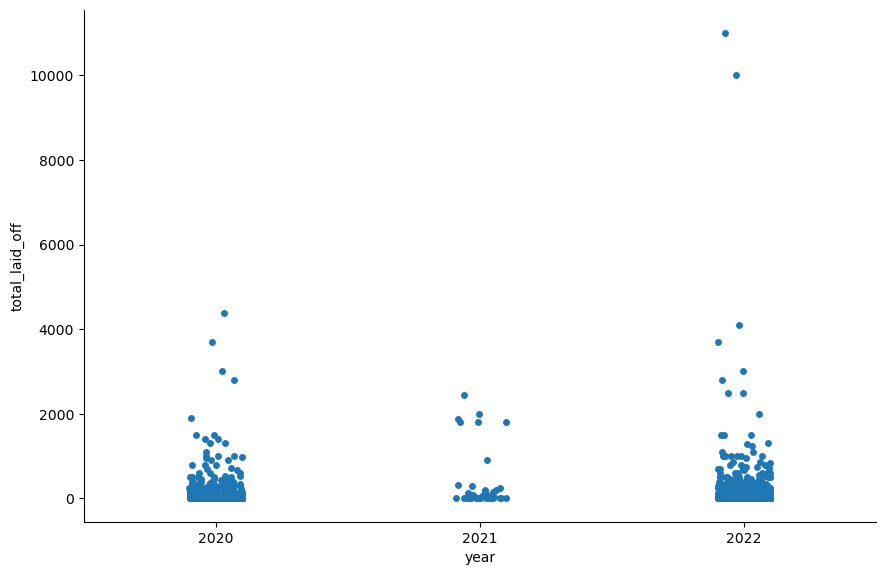

In [30]:
g = sns.catplot(x='year', y='total_laid_off', data=df_1)
g.fig.set_figwidth(10)
g.fig.set_figheight(6) 

## 6 - Total no of Layoffs - Year wise calculation :

In [31]:
df_layoffs_2022 = df_1[df_1['year']==2022]
df_layoffs_2021 = df_1[df_1['year']==2021]
df_layoffs_2020 = df_1[df_1['year']==2020]

total_laid_off_2020 = df_layoffs_2020['total_laid_off'].sum()
total_laid_off_2021 = df_layoffs_2021['total_laid_off'].sum()
total_laid_off_2022 = df_layoffs_2022['total_laid_off'].sum()

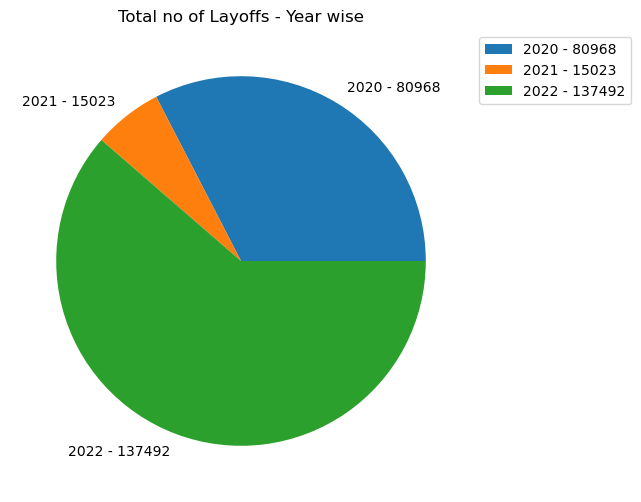

In [33]:
total_layoffs = (total_laid_off_2020,total_laid_off_2021,total_laid_off_2022)
labels = ['2020 - 80968','2021 - 15023','2022 - 137492']

plt.figure(figsize=(8,6))
plt.pie(total_layoffs, labels=labels,shadow=False)
plt.legend(labels=labels, 
           bbox_to_anchor=(1,1))
plt.title('Total no of Layoffs - Year wise')
plt.show()

## 7 - Sectorwise layoffs compared to previous Years :

C:\Users\derav\AppData\Local\Temp\ipykernel_25068\4081537415.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_sector = df_1.groupby([ df_1.industry, df_1.year]).sum()


<AxesSubplot:title={'center':'Sectorwise Layoffs in 2022,2021 & 2020'}, xlabel='industry', ylabel='total_laid_off'>

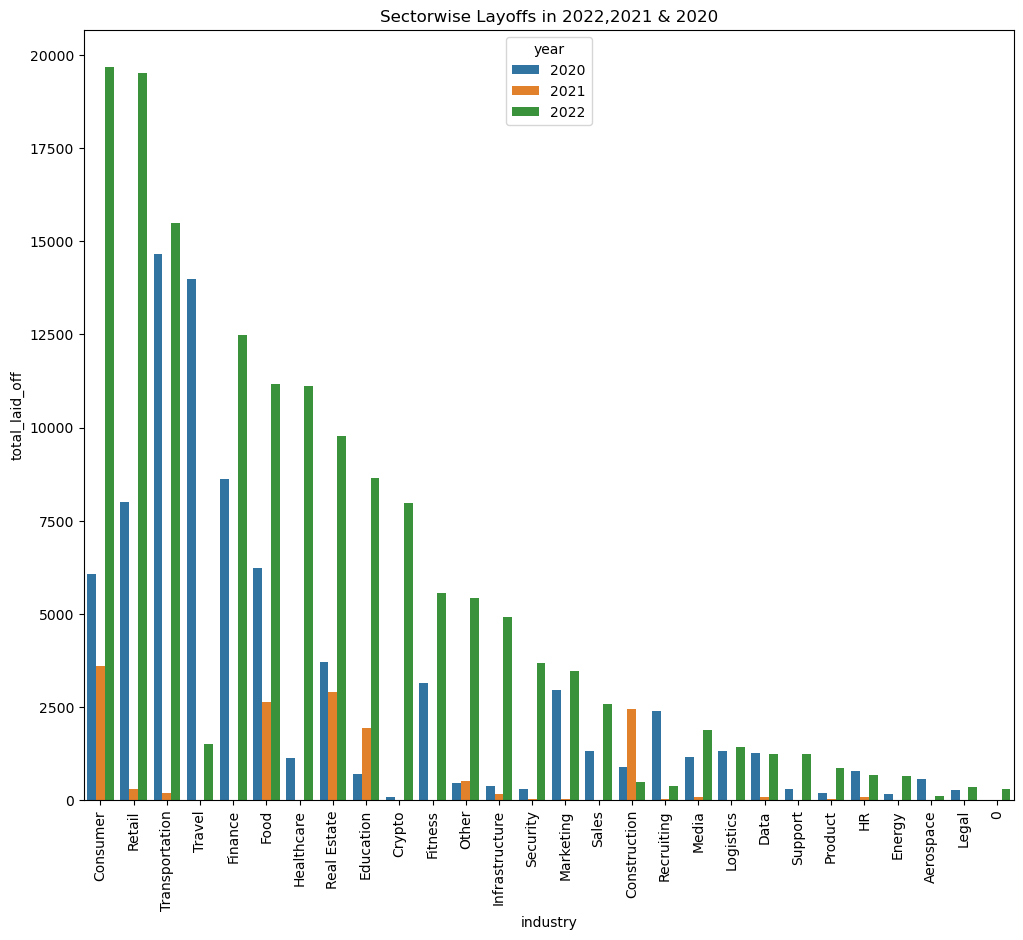

In [34]:
df_sector = df_1.groupby([ df_1.industry, df_1.year]).sum()
df_sector = df_sector.reset_index()

plt.figure(figsize=(12, 10))
plt.xticks(rotation=90)
plt.title("Sectorwise Layoffs in 2022,2021 & 2020")

sns.barplot(data=df_sector.sort_values(by=['total_laid_off','year'], ascending=False), x="industry", y="total_laid_off", hue="year")

###### Conclusion: Year 2022 have the most no of layoffs , followed by 2020(COVID)

## Layoffs in India :
###### Lets see how the economic slowdown and Layoffs have affected USA and India

In [35]:
df_india = df_1[df_1['country']=="India"]

## 8 - Most Affected Sector in India :

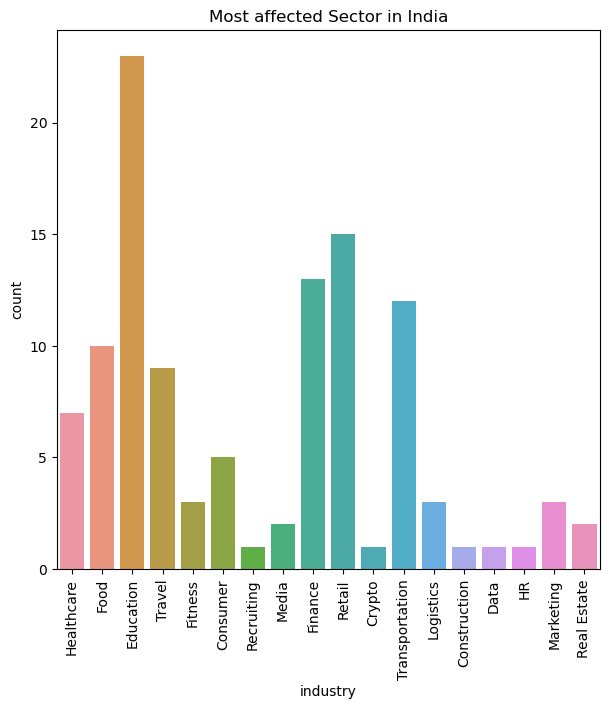

In [36]:
plt.figure(figsize=(7,7))
sns.countplot(x=df_india['industry'], data=df_india)
plt.title('Most affected Sector in India')
plt.xticks(rotation=90)
plt.show()

###### conclusion : EdTech sector is heavinly affected and laid off comparing others

## 9 - Most Affected Locations in India :

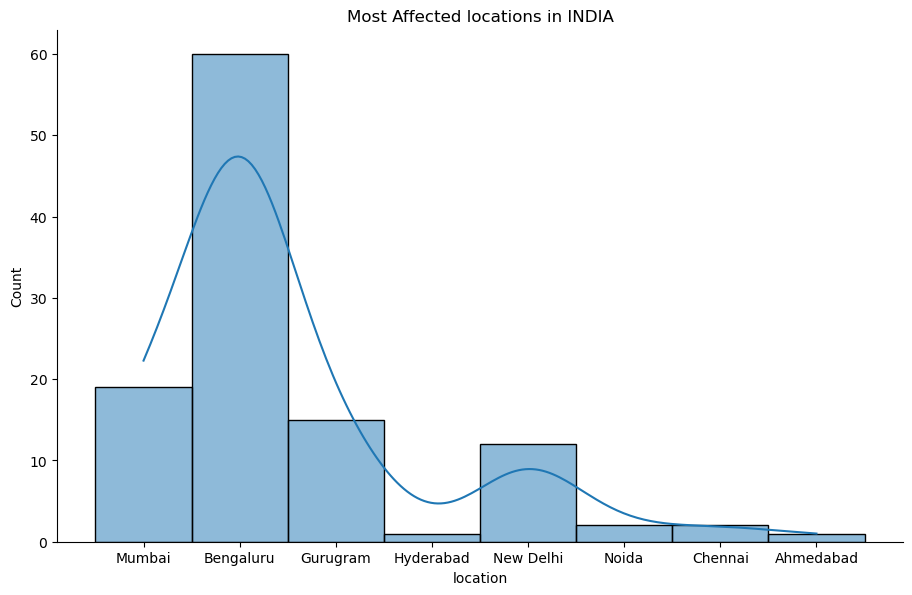

In [38]:
loc = sns.displot(x=df_india['location'], data=df_india, kde=True)
plt.title('Most Affected locations in INDIA')
loc.fig.set_figwidth(10)
loc.fig.set_figheight(6)

## 10 - No of Layoffs in Each Country:

In [39]:
df['country'].value_counts().reset_index().set_index('index')

,country
index,
United States,1201
India,112
Canada,77
United Kingdom,58
Brazil,57
Germany,51
Israel,43
Australia,35
Singapore,28
